In [1]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest'

In [2]:
def read_data(filename:str, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f :
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]  # 파일 header 제외를 위해 설정.
    return data  # 각 요소는 파일의 한 줄에 해당하며, 각 줄은 탭으로 구분된 값들로 이루어진 리스트

In [3]:
def write_data(data,filename:str,encoding='cp949'):
    with open(filename,'w',encoding=encoding) as f :
        f.write(data)

In [4]:
data = read_data('ratings.txt', encoding='cp949')
print(type(data))
data[:10]

<class 'list'>


[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'],
 ['8132799',
  '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."',
  '1'],
 ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1'],
 ['9251303', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '1'],
 ['10067386', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '1'],
 ['2190435', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화', '1'],
 ['9279041', '완전 감동입니다 다시봐도 감동', '1'],
 ['7865729', '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음', '1'],
 ['7477618', '굿', '1'],
 ['9250537', '바보가 아니라 병 쉰 인듯', '1']]

In [5]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1],
                                                  pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 
                                                         'IC', 'MM', 'MAG', 'MAJ'])
    joined_each = ' '.join(morphed_data_each)
    if joined_each:
        morphed_data += data_each[0] + '\t' + joined_each + '\t' + data_each[2] + '\n'
        
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


100%|██████████| 200000/200000 [01:04<00:00, 3095.01it/s]


In [6]:
data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data), len(data[0]))
print(data[0])

197550 3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [7]:
import random
import math
import numpy as np
random.shuffle(data)

part_num = math.floor(len(data)/3)
data = data[:part_num]
print(len(data))

65850


(근데 이럴거면 pandas로 열고 numpy로 sample 해도 되지 않나,,?)

In [8]:
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

In [9]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_senti, test_senti = train_test_split(
    data_text, data_senti, stratify=data_senti, random_state=42)

In [10]:
from collections import Counter
train_senti_freq = Counter(train_senti)
print(train_senti_freq)

test_senti_freq = Counter(test_senti)
print(test_senti_freq)

Counter({'0': 24743, '1': 24644})
Counter({'0': 8248, '1': 8215})


In [11]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_text]
print("최소길이: ", np.min(text_len)) 
print("최대길이: ", np.max(text_len)) 
print("평균길이: ", np.round(np.mean(text_len), 1)) 
print("중위수길이: ", np.median(text_len)) 
print("구간별 최대 길이: ", np.percentile(text_len, [0, 25, 50, 75, 90, 100]))

최소길이:  1
최대길이:  53
평균길이:  8.8
중위수길이:  7.0
구간별 최대 길이:  [ 1.  4.  7. 11. 18. 53.]


- (percentile) 사용할 단어 개수는 90%를 담을 수 있는 20개로 한다

In [12]:
print("최소길이 문장: ", train_text[np.argmin(text_len)])
print("최대길이 문장: ", train_text[np.argmax(text_len)])

최소길이 문장:  볼만하
최대길이 문장:  ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅅ ㅣ 이것 평점 ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ 개 ㅅ ㅣ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ 영화 만들 사람 농락 감동 ㅅ ㅣ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ


### Data Tokenizing
- 단어에 숫자 기호를 배당.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 10000 # 데이터셋에서 가장 빈도가 높은 10,000개 단어만 사용
maxlen=20 # 문장의 최대 토큰 길이를 20으로 설정.(나머지 버림)

tokenizer = Tokenizer(num_words = max_words) # 상위 빈도 10,000개
tokenizer.fit_on_texts(train_text)  # 여기서 빈도수 계산 및 인덱스 배정이 이뤄진다.
word_index = tokenizer.word_index #단어의 인덱스를 가져온다.

In [18]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))

전체에서 22011개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


- word_index의 길이는 더 높게 출력될 수 있지만, 실제로 모델에 전달될 때는 상위 10,000개의 단어만 사용된다.
    - max_words는 인덱싱할 단어의 수를 제한하는 역할을 하며, fit_on_texts는 모든 단어의 빈도를 계산한다. 
    - 따라서 고유한 토큰 수는 max_words 설정과 관계없이 전체 단어에서의 빈도에 따라 결정된다.

In [19]:
print('word_index: ', word_index)

word_index:  {'영화': 1, '하': 2, '보': 3, '없': 4, 'ㅋㅋ': 5, '재미있': 6, '좋': 7, '너무': 8, '되': 9, '정말': 10, '있': 11, '같': 12, '진짜': 13, '만들': 14, '말': 15, '나오': 16, '연기': 17, '최고': 18, '안': 19, '평점': 20, 'ㅋ': 21, '다': 22, '이': 23, '왜': 24, '이런': 25, '잘': 26, '주': 27, '스토리': 28, '드라마': 29, '때': 30, '더': 31, '알': 32, '사람': 33, '배우': 34, '가': 35, '생각': 36, '감독': 37, '아깝': 38, '내용': 39, '그냥': 40, '좀': 41, '재미': 42, '시간': 43, '지루': 44, '감동': 45, '재미없': 46, 'ㅠㅠ': 47, '쓰레기': 48, '처음': 49, '다시': 50, '사랑': 51, '들': 52, '모르': 53, '작품': 54, '이야기': 55, '아': 56, '액션': 57, '마지막': 58, '못하': 59, '그': 60, '기대': 61, '참': 62, '완전': 63, '정도': 64, '많': 65, 'ㅎㅎ': 66, '느끼': 67, '못': 68, '남': 69, '별로': 70, '지금': 71, '보이': 72, '이렇게': 73, '무슨': 74, '오': 75, '최악': 76, '느낌': 77, '10점': 78, '돈': 79, '명작': 80, '끝': 81, '마음': 82, '역시': 83, '쓰': 84, '좋아하': 85, '주인공': 86, '그리고': 87, '장면': 88, '괜찮': 89, '여자': 90, 'ㅠ': 91, '한': 92, '한국': 93, '안되': 94, '많이': 95, '살': 96, '연출': 97, 'ㅡㅡ': 98, '이것': 99, '또': 100, '웃기': 101, '이상': 

### Data Sequencing
- 텍스트를 숫자로 변환한다.
- 상위 빈도 {max_words}개의 단어만 추출하여 word_index의 숫자 리스트로 변환한다.

In [22]:
data = tokenizer.texts_to_sequences(train_text) # 데이터에 토크나이저 적용
print(f'data 0 : {data[:5]}')
print(f'texts 0 : {train_text[:5]}')

data 0 : [[183], [354, 18, 1820], [199], [6042, 24, 137, 2, 32, 243, 72, 6042, 2035], [476, 45, 290, 499, 16]]
texts 0 : ['볼만하', '몰입도 최고 개재', '개봉', '선녀 왜 필요 하 알 남루 함 돋보기 보이 선녀 힘내 ^^', '잔잔하 감동 웃음 넘치 나오 ^^']


### Data Padding
- padding은 데이터의 길이를 고정해준다.
- 지정된 길이에 모자라는 것은 앞에서 부터 0으로 채운다. (padding='pre')
- 넘치는 것은 앞에서부터 잘라낸다. (truncating='pre')

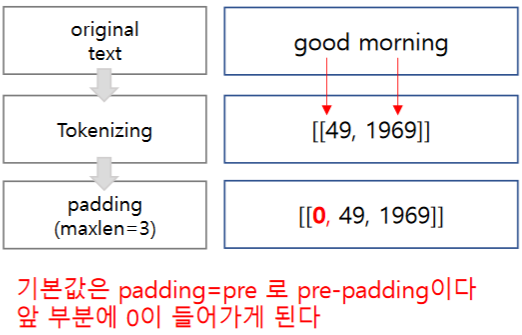

- LSTM, GRU와 같은 recurrent model은 입력 데이터의 순차적인 특성을 모델링 한다.

- pre-padding일 경우에는 앞단에 0이 채워져 마지막 단어로 패딩이 입력으로 들어가는 일이 없다.

- 반면, post-padding일 경우에는 뒷단에 0이 채워져 마지막 단어로 0이 들어갈 수 있다.

- 이는 순차적으로 데이터가 입력되는 recurrent model 들의 long-dependency를 심화시킬 수 있다.

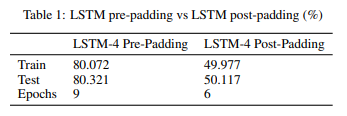
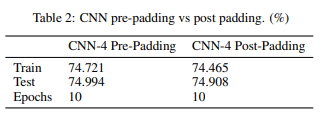
- D. M. Reddy et al, "Effects of Padding on LSTMs and CNNs", arXiv:1903.07288v1 [cs.LG], 2019.

In [23]:
data = pad_sequences(data, maxlen=maxlen, padding='pre')

print('data:', data)
print('data 0:', data[0])
print('data 0의 길이:', len(data[0]))

data: [[   0    0    0 ...    0    0  183]
 [   0    0    0 ...  354   18 1820]
 [   0    0    0 ...    0    0  199]
 ...
 [   0    0    0 ... 1117   61  102]
 [   0    0    0 ...   60  576 2226]
 [   0    0    0 ...   32    5   21]]
data 0: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 183]
data 0의 길이: 20
